In [1]:
import pandas as pd

In [2]:
housing_data = pd.read_csv('/workspaces/machine-learning-python-template-ds-2023/Ricardo/K-Means/housing.csv')
housing_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
data = housing_data[['MedInc', 'Latitude', 'Longitude']]
data.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(data, test_size=0.2, random_state=0)


In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

In [8]:
y_train = list(kmeans.labels_)
X_train['Cluster'] = y_train
X_train.head()

,MedInc,Latitude,Longitude,Cluster
12069,4.2386,33.83,-117.55,0
15925,4.3898,37.73,-122.44,2
11162,3.9333,33.83,-118.00,0
4904,1.4653,34.01,-118.26,0
4683,3.1765,34.08,-118.36,0


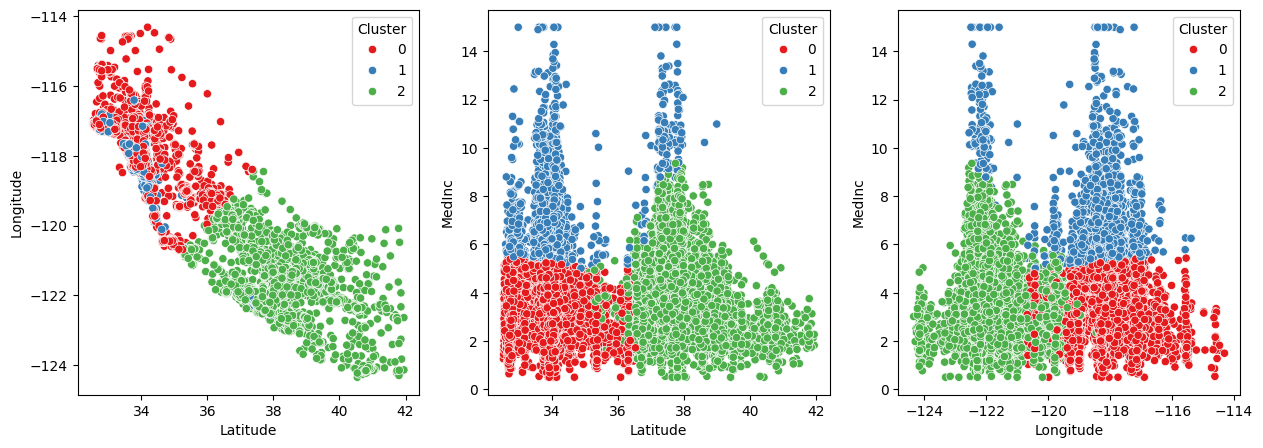

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(ax=axis[0], x='Latitude', y='Longitude', data=X_train, hue='Cluster', palette='Set1')
sns.scatterplot(ax=axis[1], x='Latitude', y='MedInc', data=X_train, hue='Cluster', palette='Set1')
sns.scatterplot(ax=axis[2], x='Longitude', y='MedInc', data=X_train, hue='Cluster', palette='Set1')

plt.show()

In [10]:
y_test = list(kmeans.predict(X_test))
X_test['Cluster'] = y_test
X_test.head()

,MedInc,Latitude,Longitude,Cluster
14740,4.1518,32.58,-117.05,0
10101,5.7796,33.92,-117.97,1
20566,4.3487,38.65,-121.84,2
2670,2.4511,33.20,-115.60,0
15709,5.0049,37.79,-122.43,2


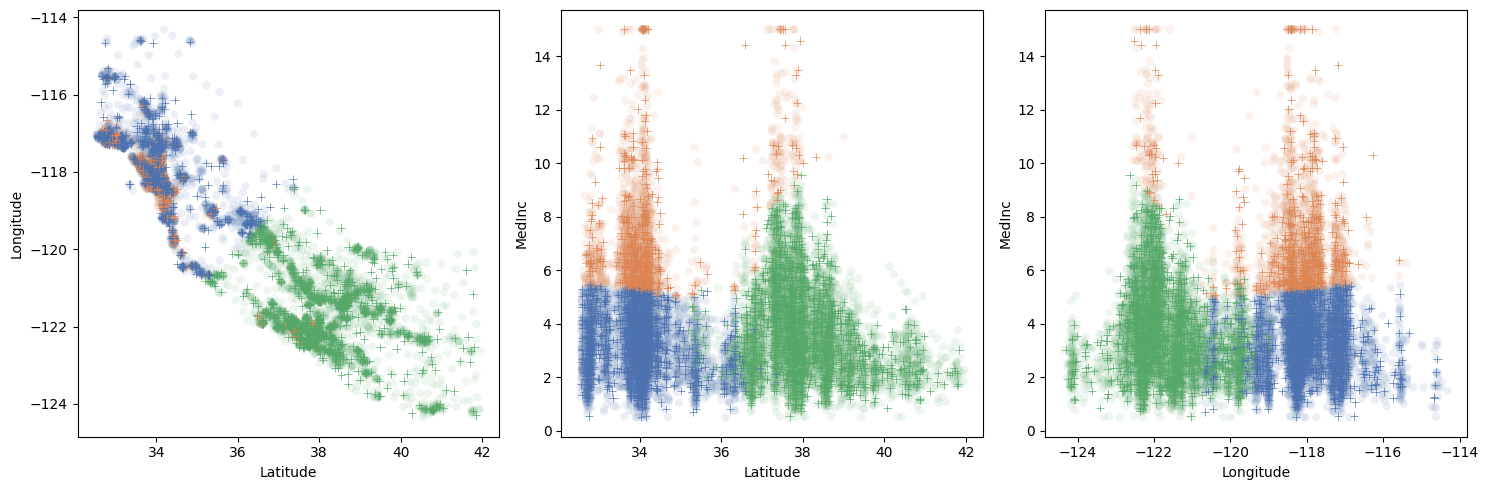

In [15]:
fig, axis = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "Cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "Cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "Cluster", palette = "deep", alpha  = 0.1)

sns.scatterplot(ax = axis[0], data = X_test, x = "Latitude", y = "Longitude", hue = "Cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[1], data = X_test, x = "Latitude", y = "MedInc", hue = "Cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[2], data = X_test, x = "Longitude", y = "MedInc", hue = "Cluster", palette = "deep", marker = "+")

plt.tight_layout()

for ax in axis:
    ax.legend([], [], frameon=False)

plt.show()

In [17]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score

y_pred_int = y_pred.astype(int)
print(accuracy_score(y_test, y_pred_int))


0.469718992248062


In [23]:
from pickle import dump

dump(kmeans, open('/workspaces/machine-learning-python-template-ds-2023/Ricardo/K-Means/Model/kmeans.pkl', 'wb'))
dump(model, open('/workspaces/machine-learning-python-template-ds-2023/Ricardo/K-Means/Model/model.pkl', 'wb' ))
